# Работа №4. Доверительные границы и интервалы

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

### 1. Основные положения
#### 1.1. Определения и построение интервалов
Пусть $(x_1, ..., x_n) = x$ - $n$ независимых наблюдений над случайной величиной с законом распределения $F(z|a)$, зависящим от параметра $a$, значение которого неизвестно.  
**Определение 1.** Функция наблюдений $a_1(x_1, ..., x_n)$ (заметим, что это случайная величина) называется нижней доверительой границей для параметра $a$ с уровнем доверия $P_д$ (обычно близким к 1), если при любом значении $a$
$$
P(a_1(x_1, ..., x_n) \le a) \ge P_д.
$$
**Определение 2.** Функция наблюдений $a_2(x_1, ...,x_n)$ (случайная величина) называется верхней доверительной границей для параметра $a$ с уровнем доверия $P_д$, если при любом значении $a$
$$
P(a_2(x_1, ..., x_n) \ge a) \ge P_д.
$$
**Определение 3.** Интервал со случайными концами (случайный интервал)
$$
I(x) = (a_1(x), a_2(x)),
$$
определяемый двумя функциями наблюдений, называется доверительным интервалом для параметра $a$ с уровнем доверия $P_д$, если при любом значении $a$
$$
P(a \in I(x)) = P(a_1(x_1, ..., x_n) \le a \le a_2(x_1, ..., x_n)) \ge P_д,
$$
то есть вероятность (зависящая от $a$) накрыть случайными интервалом I(x) истинное значение $a$ - велика: больше или равна $P_д$.  
**Построение доверительных границ и интервалов.** Для построение доверительного интервала (или границы) необходимо знать закон распределения статистики $\zeta = \zeta(x_1, ..., x_n)$, по которой оценивается неизвестный параметр (такой статистикой может быть оценка $\zeta = a^{\text{^}}(x_1, ..., x_n)$). Один из способов построение состоит в следующем. Предположим, что некоторая случайная величина $\varphi = \varphi(\zeta, a)$, зависящая от статистики $\zeta$ и неизвестного параметра $a$ такова, что
1. закон распределения $\varphi$ известен и не зависит от $a$;
2. $\varphi(\zeta, a)$ непрерывна и монотонна по $a$.  

Выберем диапазон для $\varphi$ - интервал $(f_1, f_2)$ так, чтобы попадание в него было практически достоверно:
$$
P(f_1 \le \varphi(\zeta, a) \le f_2) \ge P_д,
$$
для чего достаточно в качестве $f_1$ и $f_2$ взять квантили распределения $\varphi$ уровня ${1-P_д\over{2}}$ и ${1+P_д\over{2}}$ соответственно. Перейдем к другой записи случайного события, разрешив неравенства относительно параметра $a$; получим (пологая, что $\varphi$ монотонно возрастает по $a$):
$$
P(g(\zeta, f_1) \le a \le g(\zeta, f_2)) \ge P_д.
$$
Это соотношение верно при любом значении параметра $a$, и потому, согласно определению, случайный интервал
$$
(g(\zeta, f_1), g(\zeta, f_2))
$$
является доверительным для $a$ с уровнем доверия $P_д$. Если $\varphi$ убывает по $a$, интервалом является
$$
(g(\zeta, f_2), g(\zeta, f_1))
$$
Для построение доверительной границы для $a$ выберем значения $f_1$ и $f_2$ так, чтобы
$$
P(\varphi(\zeta, a) \ge f_1) \ge P_д, f_1 = Q(1-P_д)\\
P(\varphi(\zeta, a) \le f_2) \ge P_д, f_2 = Q(P_д)
$$
где $Q(P)$ - квантиль уровня $P$. После разрешения неравенства под знаком $P$ получим односторониие доверительные границы для $a$.
#### 1.2. Уровень доверия
Уровень доверия $P_д$ означает, что правило определения интервала дает верны йрезульатт с вероятностью $P_д$, которая обычно выбирается близкой к 1, однако, 1 не равно. Убедимся статистически на примере в том, что доверительный интервал с уровнем доверия $P_д$ может не содержать (с малой вероятностью $1-P_д$) истинное значение параметра.

**Пример.** Рассмотрим случайный интервал $I(x_1, ..., x_n)$, который при любом значении $a$ накрывает это значение с большой вероятностью $P_д$:
$$
P(a \in I(x_1, ..., x_n)) = P_д,
$$
и потому, если пренебречь возможностью осуществления события $a \notin I$, имеющую малую вероятность ($1-P_д$), можно считать событие $a\in I(x_1, ..., x_n)$ практически достоверным, то есть можно верить тому, что вычисленный по конкретным наблюдениям $x_1, ..., x_n$ интервал $I$ содержит неизвестное значение параметра $a$.  
Испытаем интервал на 50 выборках объема $n=10$ для трех уровней доверия $P_д$: 0.9, 0.99, 0.99 (соответственно, три значения $f_p$).  
При $P_д = 0.9$ число неверных из $k = 50$ результатов окажется в окрестности 5, так как среднее чисдо неверных $k(1-P_д) = 5$;  
При $P_д = 0.99$ появление хотя бы одного неверного из $k = 50$ весьма вероятно: вероятность этого события $1-P_д^k = 1-0.99^{50} = 0.61$;  
При $P_д = 0.999$ появление хотя бы одного неверного весьма сомнительно: вероятность этого события $1-P_д^k = 1-0.999^{50} = 0.05$;  
**Задание.**  
1. Определить, сколько из $k = 50$ доверительный интервал оказался неверным; это сделаем для трех значений $P_д$.
2. Провести аналогично 50 испытаний доверительного интервала для случая неизвестной дисперсии.

In [2]:
data = np.array([np.array([np.random.normal(10, 2) for _ in range(10)]) for _ in range(50)])
means = []
for sample in data:
    means.append([sample.mean()])

data = np.hstack((data, means))
df = pd.DataFrame(data, columns=['']*10+['mean'])
df

,,,,,,,,,,,mean
0,11.650069,10.456161,9.390538,11.421692,9.498106,10.980331,9.419768,6.184254,9.976883,10.563382,9.954118
1,6.194695,5.022276,8.652672,10.793446,10.055789,10.581573,13.317924,7.261950,11.115068,11.489361,9.448475
2,12.199956,9.611537,12.628570,7.808994,10.072384,10.119247,7.105686,9.569619,11.621833,10.649794,10.138762
3,8.878136,10.631822,9.117799,10.362580,10.053549,8.846858,10.633978,9.324627,5.597258,10.631396,9.407800
4,10.280114,11.931570,7.369167,6.914498,6.972300,7.175206,10.807527,11.677883,9.110073,11.151720,9.339006
5,9.960960,8.937976,9.748501,7.730849,11.063088,15.819798,15.632405,8.820995,8.029835,5.963369,10.170778
6,8.695077,9.839560,12.006206,11.525291,10.147032,11.151252,13.671268,12.919333,10.772172,14.503823,11.523101
7,9.117651,11.577501,11.929054,8.679643,11.063588,10.300511,11.214108,8.915836,9.181718,11.121740,10.310135
8,9.984960,15.245127,6.685486,12.516821,7.092430,10.572396,8.356785,9.978827,13.382756,11.382277,10.519787
9,6.256111,8.617001,12.769576,7.053354,7.724917,13.942884,10.702074,8.710188,12.116612,13.210991,10.110371


In [3]:
fp095 = stats.norm(0, 1).ppf(0.95)
fp0995 = stats.norm(0, 1).ppf(0.995)
fp09995 = stats.norm(0, 1).ppf(0.9995)
print('Квантиль 0.95   =', fp095,   '; уровень доверия Pд =', np.round(2*0.95-1, 6))
print('Квантиль 0.995  =', fp0995,  '; уровень доверия Pд =', np.round(2*0.995-1, 6))
print('Квантиль 0.9995 =', fp09995, '; уровень доверия Pд =', np.round(2*0.9995-1, 6))

Квантиль 0.95   = 1.6448536269514722 ; уровень доверия Pд = 0.9
Квантиль 0.995  = 2.5758293035489004 ; уровень доверия Pд = 0.99
Квантиль 0.9995 = 3.2905267314919255 ; уровень доверия Pд = 0.999


In [4]:
df['left0.95'] = df['mean'] - fp095*2 / np.sqrt(10)
df['right0.95'] = df['mean'] + fp095*2 / np.sqrt(10)
df

,,,,,,,,,,,mean,left0.95,right0.95
0,11.650069,10.456161,9.390538,11.421692,9.498106,10.980331,9.419768,6.184254,9.976883,10.563382,9.954118,8.913822,10.994415
1,6.194695,5.022276,8.652672,10.793446,10.055789,10.581573,13.317924,7.261950,11.115068,11.489361,9.448475,8.408179,10.488772
2,12.199956,9.611537,12.628570,7.808994,10.072384,10.119247,7.105686,9.569619,11.621833,10.649794,10.138762,9.098465,11.179059
3,8.878136,10.631822,9.117799,10.362580,10.053549,8.846858,10.633978,9.324627,5.597258,10.631396,9.407800,8.367504,10.448097
4,10.280114,11.931570,7.369167,6.914498,6.972300,7.175206,10.807527,11.677883,9.110073,11.151720,9.339006,8.298709,10.379303
5,9.960960,8.937976,9.748501,7.730849,11.063088,15.819798,15.632405,8.820995,8.029835,5.963369,10.170778,9.130481,11.211074
6,8.695077,9.839560,12.006206,11.525291,10.147032,11.151252,13.671268,12.919333,10.772172,14.503823,11.523101,10.482805,12.563398
7,9.117651,11.577501,11.929054,8.679643,11.063588,10.300511,11.214108,8.915836,9.181718,11.121740,10.310135,9.269838,11.350432
8,9.984960,15.245127,6.685486,12.516821,7.092430,10.572396,8.356785,9.978827,13.382756,11.382277,10.519787,9.479490,11.560083
9,6.256111,8.617001,12.769576,7.053354,7.724917,13.942884,10.702074,8.710188,12.116612,13.210991,10.110371,9.070074,11.150668


<AxesSubplot:title={'center':'Уровень доверия Pд = 0.9'}>

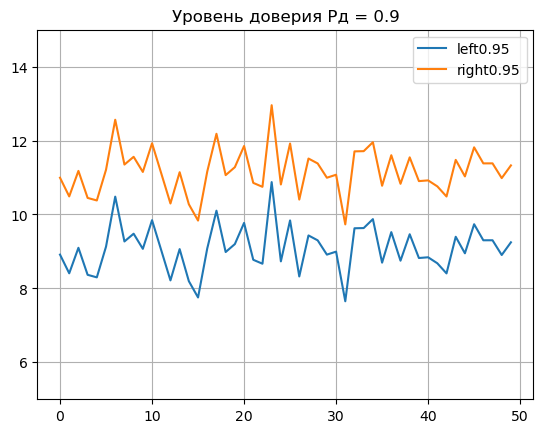

In [5]:
df[['left0.95', 'right0.95']].plot(grid=True, ylim=(5, 15), title='Уровень доверия Pд = 0.9')

<AxesSubplot:title={'center':'Уровень доверия Pд = 0.99'}>

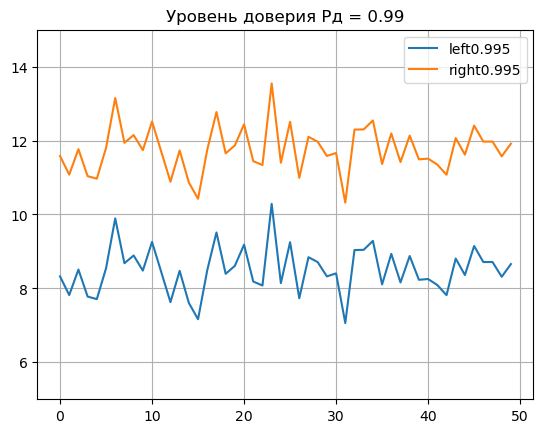

In [6]:
df['left0.995'] = df['mean'] - fp0995*2 / np.sqrt(10)
df['right0.995'] = df['mean'] + fp0995*2 / np.sqrt(10)
df[['left0.995', 'right0.995']].plot(grid=True, ylim=(5, 15), title='Уровень доверия Pд = 0.99')

<AxesSubplot:title={'center':'Уровень доверия Pд = 0.999'}>

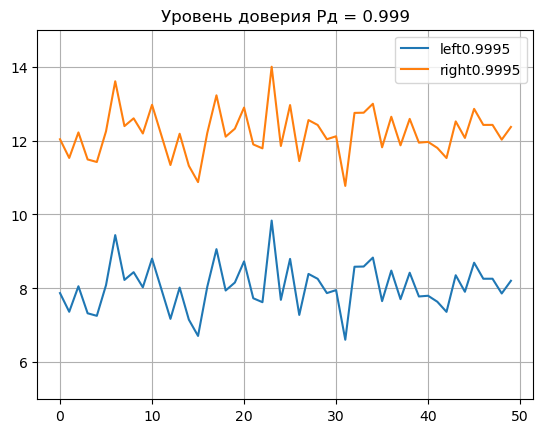

In [7]:
df['left0.9995'] = df['mean'] - fp09995*2 / np.sqrt(10)
df['right0.9995'] = df['mean'] + fp09995*2 / np.sqrt(10)
df[['left0.9995', 'right0.9995']].plot(grid=True, ylim=(5, 15), title='Уровень доверия Pд = 0.999')

**Для случая неизвестной дисперсии**  
Для оценки квантилей будет использоваться распределение Стьюдента уровня $1 - {\alpha\over2}$ с $n - 1$ степенью свободы. В данном случае $P_д = 0.9$ и 9 степеней свододы.

In [8]:
data = np.array([np.array([np.random.normal(10, 2) for _ in range(10)]) for _ in range(50)])
means, std = [], []
for sample in data:
    means.append([sample.mean()])
    std.append([sample.std()])

data = np.hstack((data, means, std))
df = pd.DataFrame(data, columns=['']*10+['mean']+['std'])

In [9]:
t_095 = stats.t.ppf(0.95, df=9)
print('Квантиль 0.95   =', t_095,   '; уровень доверия Pд =', np.round(2*0.95-1, 6))

Квантиль 0.95   = 1.8331129326536335 ; уровень доверия Pд = 0.9


In [10]:
df['left095'] = df['mean'] - df['std'] * t_095 / np.sqrt(10)
df['right095'] = df['mean'] + df['std'] * t_095 / np.sqrt(10)

<AxesSubplot:title={'center':'Уровень доверия Pд = 0.9 для случая неизвестной дисперсии'}>

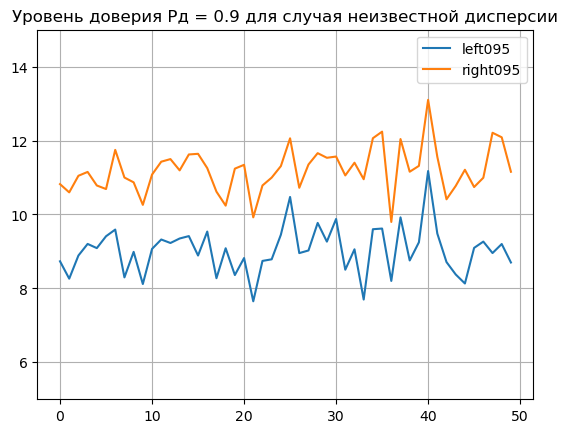

In [11]:
df[['left095', 'right095']].plot(grid=True, ylim=(5, 15), title='Уровень доверия Pд = 0.9 для случая неизвестной дисперсии')

#### 1.3. Интервалы для параметров нормального распределения
Пусть $x_1, ..., x_n$ - выборка из нормального $N(a, \sigma^2)$ распределения; значения среднего $a$ и дисперсии $\sigma^2$ неизвестны. Оценки для $a$ и $\sigma^2$:
$$
a^{\text{^}} = {1\over{n}} \sum\limits_{i=1}^n x_i = \overline{x}, \text{ } s^2 = {1\over{n-1}} \sum\limits_{i=1}^n (x_i - \overline{x})^2.
$$
Как известной, доверительным интервалом для среднего $a$ с уровнем доверия $P_д$ при неизвестной дисперсии является интервал
$$
I(x) = (a_1(x), a_2(x)), a_1 = \overline{x} - t_p \cdot {s\over{\sqrt{n}}}, a_2 = \overline{x} + t_p \cdot {s\over{\sqrt{n}}}
$$
$t_p$ - квантиль порядка ${1+P_д\over{n}}$ распределения Стьюдента с $n-1$ степенями свободы.  
Доверительным интервалом для стандартного отклонения $\sigma$ с уровнем доверия $P_д$ является интервал
$$
I(x) = (\sigma_1(x), \sigma_2(x)), \sigma_1 = s\sqrt{{n-1\over{t_1}}}, \sigma_1 = s\sqrt{{n-1\over{t_2}}},
$$
$t_1$ и $t_2$ - квантили порядков соответственно ${1+P_д\over{2}}$ и ${1-P_д\over{2}}$ распределения хи-квадрат с $n-1$ степенями свободы.  
Сгенерируем выборку объема $n=20$ из нормального распределения с параметрами $a=10, \sigma^2 = 2^2 = 4$ и определим доверительные интервалы для $a$ и $\sigma$ с уровнем доверия $P_д: 0.8, 0.9 , 0.95 , 0.98 , 0.99 , 0.995 , 0.998 , 0.999$. Результаты выпишем в виде таблицы. С ростом $P_д$ интервад расширяется, с ростом $n$ - уменьшается.

In [30]:
n = 20
data = np.array([np.random.normal(10, 2) for _ in range(n)])
degree_of_confidence = np.array([0.8, 0.9, 0.95, 0.98, 0.99, 0.995, 0.998, 0.999])
x_mean = data.mean()
s = np.sqrt(np.sum(np.power(data - a_mean, 2)) / (n-1))

tp = stats.t.ppf(degree_of_confidence, df=n-1)
tstd1 = stats.chi2.ppf((1+degree_of_confidence)/2, df=n-1)
tstd2 = stats.chi2.ppf((1-degree_of_confidence)/2, df=n-1)
df = pd.DataFrame()
a_left = []
a_right = []
std_left = []
std_right = []
for i in range(len(tp)):
    a_left.append(x_mean - tp[i]*s/np.sqrt(n))
    a_right.append(x_mean + tp[i]*s/np.sqrt(n))
    std_left.append(s*np.sqrt((n-1)/tstd1[i]))
    std_right.append(s*np.sqrt((n-1)/tstd2[i]))

pd.DataFrame(np.array([a_left, a_right, std_left, std_right]).T,
             columns=['a_left', 'a_right', 'std_left', 'std_right'],
             index=(degree_of_confidence))

,a_left,a_right,std_left,std_right
0.800,9.341384,10.147331,1.749352,2.673069
0.900,9.122906,10.365809,1.661855,2.868560
0.950,8.935026,10.553689,1.591868,3.057287
0.980,8.712433,10.776282,1.516668,3.302556
0.990,8.555736,10.932979,1.468914,3.487675
0.995,8.405278,11.083437,1.426948,3.674011
0.998,8.212339,11.276376,1.378329,3.923913
0.999,8.068996,11.419719,1.345669,4.116669


#### Задание.
Определить верхние доверительные границы для $a$ и $\sigma$ с уровнем доверия $P_д = 0.95$

In [33]:
n = 20
data = np.array([np.random.normal(10, 2) for _ in range(n)])
tp = stats.t.ppf(0.95, df=n-1)
tstd2 = stats.chi2.ppf((1-0.95)/2, df=n-1)
print('Верхняя доверительная граница для a = ', x_mean - tp*s/np.sqrt(n))
print('Верхняя доверительная граница для 𝜎 = ', s * np.sqrt((n-1)/tstd2))

Верхняя доверительная граница для a =  8.935025566411026
Верхняя доверительная граница для 𝜎 =  3.057286943641687


#### 1.4. Задание на самостоятельную работу
1. для заданной задачи построить оценку заданным методом (варианты заданий см. ниже); 
2. построить доверительный интервал, основанный на этой оценке; 
3. сгенерировать выборку заданного объема;
4. вычислить доверительный интервал.

**Задача 1.** Расстояние $a$ до некоторого объекта измерялось $n_1$ раз одним прибором и $n_2$ - вторым; результаты $x_1,...,x_{n1}$; $y_1,...,y_{n2}$. Оба прибора при каждом измерении дают независимые случайные ошибки, нормально распределенные со средним 0 и стандартными отклонениями $\sigma_1$ и $\sigma_2$ соответственно. Методом максимального правдоподобия построить оценку $\stackrel{\text{^}}{a}$ для $a$ и доверительный интервал с уровнем доверия $P_д$.  
Исходные данные:  
$n_1 = 5$,  
$n_2 = 10$,  
$\sigma_1 = 3$,  
$\sigma_2 = 5$,  
$P_д = 0.95$,  
$a = 300$.

Построим оценку $\stackrel{\text{^}}{a}$ для $a$ методом максимального правдоподобия. Измерения приборов распределены нормально по законам:  
$$x_1, x_2, ..., x_{n1} \text{~} N(a, \sigma_1^2)$$
$$y_1, y_2, ..., y_{n2} \text{~} N(a, \sigma_2^2)$$
Найдем функцию правдоподобия:
$$
p = p(x_1, x_2, ..., x_{n1}, y_1, y_2, ..., y_{n2} | a, \sigma_1, \sigma_2) = \\
=\prod\limits_{i=1}^{n_1}{1\over{\sqrt{2\pi \sigma_1^2}}} e^{-{{(x_i-a)^2}\over{2\sigma_1^2}}} \cdot \prod\limits_{j=1}^{n_2}{1\over{\sqrt{2\pi \sigma_2^2}}} e^{-{{(y_j-a)^2}\over{2\sigma_2^2}}} = \\
= \Biggl{(} {1\over{\sqrt{2\pi \sigma_1^2}}} \Biggl{)}^{n_1} \Biggl{(} {1\over{\sqrt{2\pi \sigma_2^2}}} \Biggl{)}^{n_2} e^{-{{\sum\limits_{i=1}^{n_1}(x_i-a)^2}\over{2\sigma_1^2}}-{{\sum\limits_{j=1}^{n_2}(y_j-a)^2}\over{2\sigma_2^2}}}
$$
Найдем функцию логарифмического правдоподобия:
$$
ln(p) = ln\Biggl{(} {1\over{\sqrt{2\pi \sigma_1^2}}} \Biggl{)}^{n_1} + ln\Biggl{(} {1\over{\sqrt{2\pi \sigma_2^2}}} \Biggl{)}^{n_2} {-{{\sum\limits_{i=1}^{n_1}(x_i-a)^2}\over{2\sigma_1^2}}-{{\sum\limits_{j=1}^{n_2}(y_j-a)^2}\over{2\sigma_2^2}}}
$$
Найдем производную логарифмического правдоподобия по a:
$$
[ln(p)]_a^\text{'} = {{\sum\limits_{i=1}^{n_1}(x_i-a)}\over{\sigma_1^2}}+{{\sum\limits_{j=1}^{n_2}(y_j-a)}\over{\sigma_2^2}} = {{\sum\limits_{i=1}^{n_1}x_i-n_1a}\over{\sigma_1^2}}+{{\sum\limits_{j=1}^{n_2}y_j-n_2a}\over{\sigma_2^2}} = 0
$$
Откуда находим:
$$
\stackrel{\text{^}}{a} \text{ } = {\sigma_2^2\sum\limits_{i=1}^{n_1}x_i + \sigma_1^2\sum\limits_{j=1}^{n_2}y_j\over{n_1\sigma_2^2 + n_2\sigma_1^2}}
$$
Дисперсия оценки:
$$
\stackrel{\text{^}}{a} \text{ } = {\sigma_1^2\sigma_2^2\over{n_1\sigma_2^2 + n_2\sigma_1^2}} \\
\stackrel{\text{^}}{a} \text{~} N\big(a, {\sigma_1^2\sigma_2^2\over{n_1\sigma_2^2 + n_2\sigma_1^2}}\big)
$$
Построим доверительный интервал для $\stackrel{\text{^}}{a}$:
$$
\varphi(\stackrel{\text{^}}{a}, a) = {\stackrel{\text{^}}{a}-a\over{\sqrt{c}}}
$$
где
$$
c = {\sigma_1^2\sigma_2^2\over{n_1\sigma_2^2 + n_2\sigma_1^2}} \text{ ~ } N(0, 1) \\
P(-f_p < \varphi(\stackrel{\text{^}}{a}, a) < f_p) = P_д \\
P(-f_p < {\stackrel{\text{^}}{a}-a\over{\sqrt{c}}}, a) < f_p) = P_д \\
P(\stackrel{\text{^}}{a}-\sqrt{c}f_p < a < \stackrel{\text{^}}{a}+\sqrt{c}f_p) = P_д \\
\text{где }f_p\text{ - квантиль уровня }{P_д + 1\over2}
$$

In [57]:
n1 = 5
n2 = 10
a = 300
std1 = 3
std2 = 5
data1 = np.array([np.random.normal(a, std1) for _ in range(n1)])
data2 = np.array([np.random.normal(a, std2) for _ in range(n2)])
a_est = ((std2**2)*data1.sum() + (std1**2)*data2.sum()) / (n1*(std2**2) + n2*(std1**2))
print('Оценка для параметра а:', a_est)

Оценка для параметра а: 300.3189184959833


In [58]:
degree_of_confidence = 0.95
c = (std1**2 * std2**2) / (n1*(std2**2) + n2*(std1**2))
tp = stats.norm.ppf((1+degree_of_confidence)/2)
left = a_est - tp * np.sqrt(c)
right = a_est + tp * np.sqrt(c)
print(f'Доверительный интервал с уровнем доверия {degree_of_confidence} = ({left}, {right})')

Доверительный интервал с уровнем доверия 0.95 = (298.31389198144984, 302.3239450105168)
